In [1]:
import csv
import warnings
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from random import gauss
from random import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
train = pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv')
test = pd.read_csv('competitive-data-science-predict-future-sales/test.csv')
itemos = pd.read_csv('competitive-data-science-predict-future-sales/items.csv')

In [3]:
print(train.columns,'\n',
test.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object') 
 Index(['ID', 'shop_id', 'item_id'], dtype='object')


In [4]:
X_train = train[['date', 'date_block_num', 'shop_id', 'item_id', 'item_price']]
y_train = train['item_cnt_day']

In [6]:
trainmonth = train[['date_block_num', 'item_cnt_day']].groupby(['date_block_num']).sum().reset_index()
print(trainmonth[:5])

   date_block_num  item_cnt_day
0               0      131479.0
1               1      128090.0
2               2      147142.0
3               3      107190.0
4               4      106970.0


In [23]:
train['date'] = pd.to_datetime(train['date'])
train.sort_values(by='date', inplace = True)

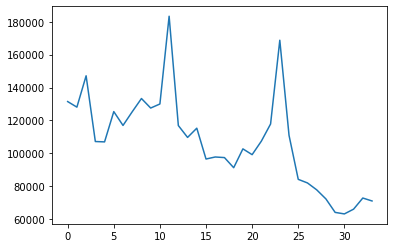

In [7]:
plt.plot(trainmonth['date_block_num'], trainmonth['item_cnt_day'])
plt.show()

In [40]:
print(trainmonth['item_cnt_day'].describe())

count        34.000000
mean     107300.176471
std       28456.020577
min       63187.000000
25%       85968.500000
50%      107306.000000
75%      125358.500000
max      183342.000000
Name: item_cnt_day, dtype: float64


In [44]:
q1 = trainmonth['item_cnt_day'].quantile(.25)
q3 = trainmonth['item_cnt_day'].quantile(.75)
iqr = q3 - q1

outliermin = q1 - 1.5*iqr
outliermax = q3 + 1.5*iqr

print(outliermin, outliermax)

26883.5 184443.5


In [48]:
y_train.describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [51]:
train.loc[train['item_cnt_day'].idxmax()]

date              2015-10-28 00:00:00
date_block_num                     33
shop_id                            12
item_id                         11373
item_price                   0.908714
item_cnt_day                   2169.0
Name: 2909818, dtype: object

In [53]:
print(itemos.loc[itemos['item_id'].iloc[11373]])

item_name           Доставка до пункта выдачи (Boxberry)
item_id                                            11373
item_category_id                                       9
Name: 11373, dtype: object


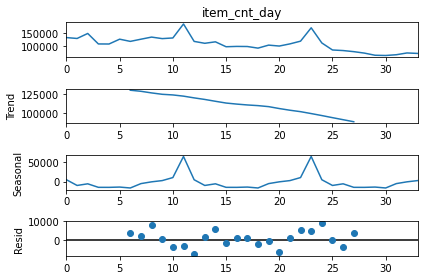

In [58]:
decomposition = sm.tsa.seasonal_decompose(trainmonth['item_cnt_day'], period = 12) 
figure = decomposition.plot()
plt.show()

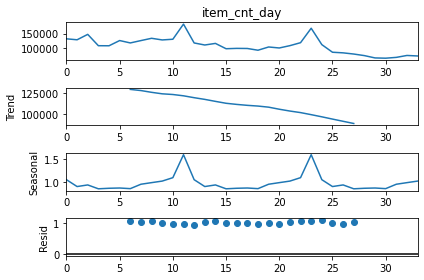

In [59]:
decomposition2 = sm.tsa.seasonal_decompose(trainmonth['item_cnt_day'], period = 12, model='multiplicative') 
figure = decomposition2.plot()
plt.show()